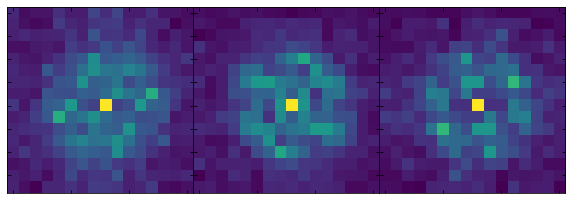

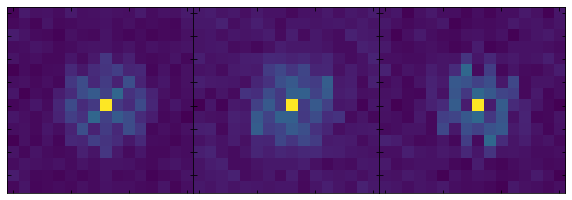

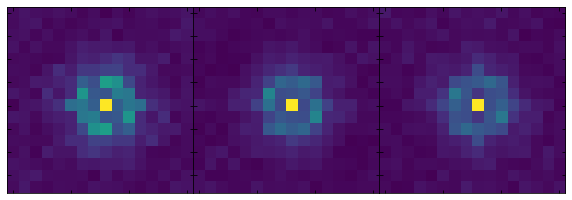

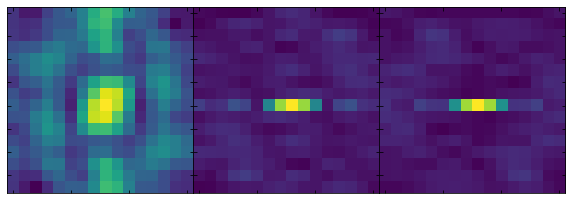

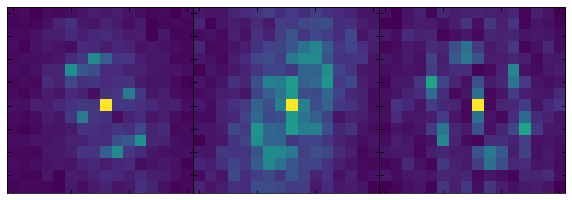

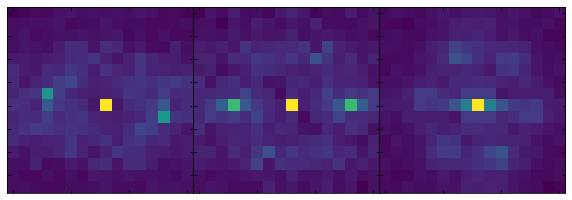

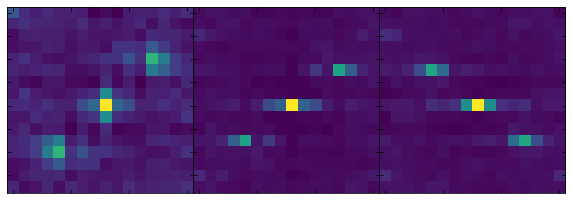

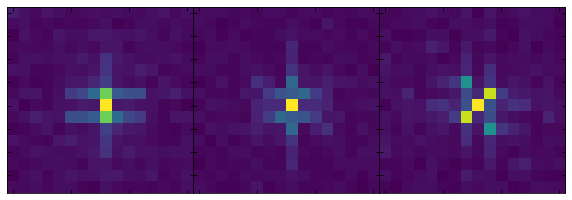

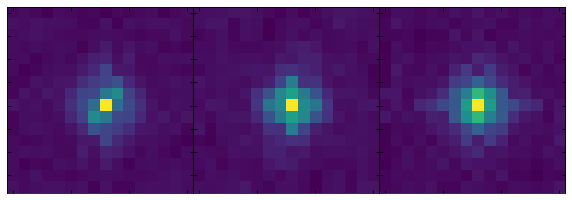

In [1]:
import random
import os
from utils import *
res = 16
for phase in ['bcc', 'dd', 'dg', 'dis', 'hpc', 'hpl', 'lam', 'p', 'sg']:
    data_path = f'/mnt/ssd1/donny/test_pn/pointnet.pytorch/point_clouds/{phase}/points/'
    filenames = os.listdir(data_path)
    sample = filenames[random.randint(0, 3000)]
    file_path = os.path.join(data_path, sample)
    sim_box, _ = map_coord_from_pts(file_path, res)
    FT_shifted = FT_calc(sim_box, keep=1)
    plot_FT(FT_shifted)

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # NOQA
import matplotlib.colors

data_path = './point_clouds/dg/'
sample = 'coord_O_dg_1295.pts'
file_path = os.path.join(data_path, sample)
sim_box, coord = map_coord_from_pts(file_path, res)

<IPython.core.display.Javascript object>


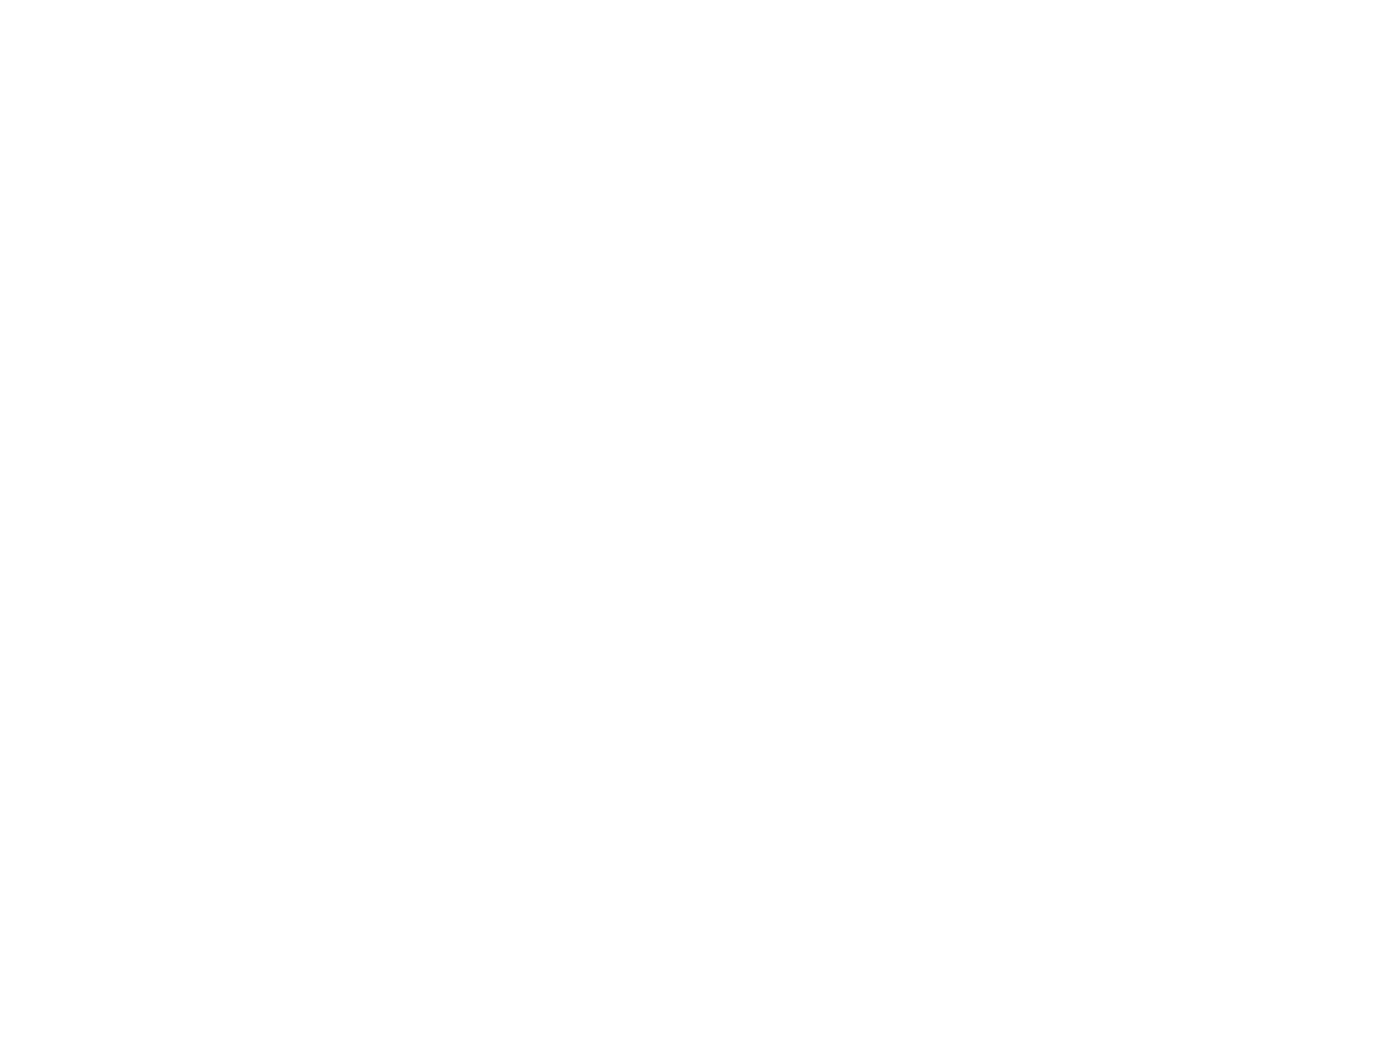

In [3]:
def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = sim_box

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = gc
colors[..., 1] = bc
colors[..., 2] = rc

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
# ax.set(xlabel='r', ylabel='g', zlabel='b')

plt.show()

In [4]:
from copy import deepcopy

def dfs(voxel, i, j, k):
    if i < 0 or i >= len(voxel) or j < 0 or j >= len(voxel[0]) or k < 0 or k >= len(voxel[0][0]) or voxel[i][j][k] == 0:
        return
    voxel[i][j][k] = 0
    dirs = [(n, p, q) for n in range(-1,2) for p in range(-1,2) for q in range(-1,2) if not (n==p==q==0)]
    for di, dj, dk in dirs:
        dfs(voxel, i+di, j+dj, k+dk)       

def num_clusters(voxel):
    count = 0
    for i in range(len(voxel)):
        for j in range(len(voxel[0])):
            for k in range(len(voxel[0][0])):
                if voxel[i][j][k]:
                    if count < 1:
                        count += 1
                        dfs(voxel, i, j, k)
                    else:
                        break
    return count
vox = sim_box.tolist()
vox_prev = deepcopy(vox)
num_clusters(vox)
vox_rec = (np.array(vox) != np.array(vox_prev))

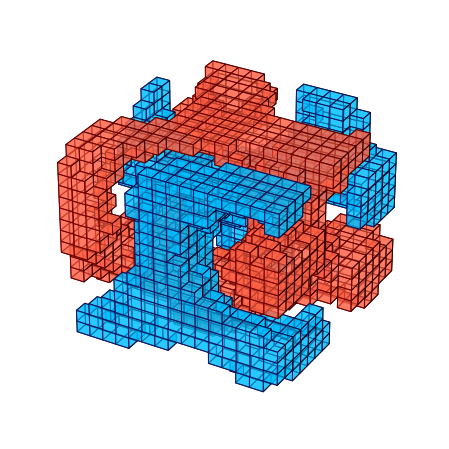

In [5]:
%matplotlib inline
cluster_1 = np.array(vox)
cluster_2 = np.array(vox_rec)

ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.voxels(cluster_1, facecolor='deepskyblue', alpha = 0.6, edgecolors='midnightblue')
ax.voxels(cluster_2, facecolor='tomato', alpha = 0.6, edgecolors='maroon')
ax.axis('off')

plt.show()

In [6]:
display_minority(coord)

/home/donny/anaconda3/envs/ftcnn/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



(-0.8, 16.8, -0.8, 16.8)

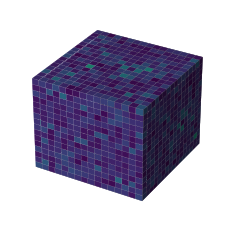

In [7]:

# combine the color components


sphere =FT_calc(sim_box, keep=0.9999)


colors = np.empty([16, 16, 16, 4], dtype=np.float32)
alpha = np.log(sphere + 1) / np.max(np.log(sphere + 1))

min_ele = min([i for i in np.sort(alpha.ravel()) if i != 0])
max_ele = 1
alpha = (alpha - min_ele) / (max_ele - min_ele)
# alpha[alpha < 0] = 0

for i in range(16):
    for j in range(16):
        for k in range(16):
            colors[i, j, k][:-1] = plt.cm.viridis(normalize_pts(sphere)[i, j, k] * 16)[:-1]
            
            colors[i, j, k][-1] = 0.99
            
            
# set all internal colors to black with alpha=1
# colors[1:-1, 1:-1, 1:-1, 0:3] = 0
# colors[1:-1, 1:-1, 1:-1, 3] = 1

fig = plt.figure()

ax = fig.add_subplot('111', projection='3d')
ax.voxels(sphere, facecolors=colors, edgecolors='w', linewidth=0.1)
ax.axis('off')
